Relocate.me WebScraper
A Jupyter Notebook that webscrapes a site specifically listing developer jobs with relocation packages.

Import Beautiful Soup, Requests, Pandas & Matplotlib

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib

Parses through all the pages of the main Relocate.me search results

In [2]:
all_skills=[]
all_jobs=[]
page = 1
while page != 15:
    new_url = f"https://relocate.me/search?page={page}"
    r = requests.get(new_url).text
    soup = BeautifulSoup( r, 'lxml')
    jobs = soup.find_all('div', class_="jobs-list__job")
  
    for job in jobs:
        name = job.find('div', class_='job__title').text;
        all_jobs.append(name);
        skills = job.find_all('span', class_= 'job__tag');

        for skill in skills:
          
            item = skill.text
            all_skills.append(item)
         
    page = page + 1
    print(new_url)

https://relocate.me/search?page=1
https://relocate.me/search?page=2
https://relocate.me/search?page=3
https://relocate.me/search?page=4
https://relocate.me/search?page=5
https://relocate.me/search?page=6
https://relocate.me/search?page=7
https://relocate.me/search?page=8
https://relocate.me/search?page=9
https://relocate.me/search?page=10
https://relocate.me/search?page=11
https://relocate.me/search?page=12
https://relocate.me/search?page=13
https://relocate.me/search?page=14


Functions to count instances

In [3]:
def count_strict(results, query):
    count=0
    for result in results:
        if(result== query):
            count +=1
    return count

In [4]:
def count_flex(results, query):
    count=0
    for result in results:
        if (query in result):
                count +=1
    return count

What's the best programming language to learn to get a relocation package?

In [13]:
lang_list=['Java', 'Python', 'JavaScript', 'Ruby']
lang_values=[count_strict(all_skills, "Java"),
count_strict(all_skills, "Python"), 
count_strict(all_skills, "JavaScript"), 
count_strict(all_skills, "Ruby") ]
lang_df = pd.DataFrame({"programing languages":lang_list, "mentions in jobs":lang_values})

print(lang_df)


  programing languages  mentions in jobs
0                 Java                55
1               Python                50
2           JavaScript                39
3                 Ruby                 8


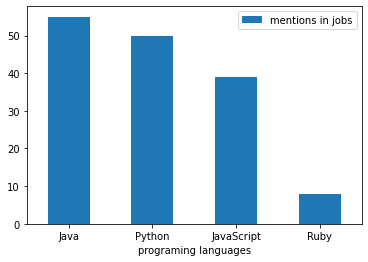

In [6]:
ax = lang_df.plot.bar(x="programing languages",rot=0)

What's the most the most needed JS Framework to learn?

In [14]:

frameworks_list =["React", 
"Angular", 
"Vue"]
frameworks_values=[count_strict(all_skills, "React"),
count_strict(all_skills, "Angular"),
count_strict(all_skills, "Vue")]


fr_df = pd.DataFrame({"mentions in jobs":frameworks_values}, index=frameworks_list)

print(fr_df)

         mentions in jobs
React                  19
Angular                 9
Vue                     1


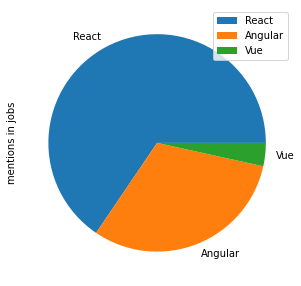

In [8]:
ax = fr_df.plot.pie(y="mentions in jobs", figsize=(5,5))

What roles are overseas companies looking for?

In [23]:
roles_list=["Frontend", 
"Backend", 
"Android",
"iOS",
"Design",
"Data",
"QA",
"Web",
"Product"
]
roles_values=[count_flex(all_jobs, "Frontend"),
count_flex(all_jobs, "Backend"),
count_flex(all_jobs, "Android"),
count_flex(all_jobs, "iOS"),
count_flex(all_jobs, "Design"),
count_flex(all_jobs, "Data"),
count_flex(all_jobs, "QA"),
count_flex(all_jobs, "Web"),
count_flex(all_jobs, "Product")]
roles_df = pd.DataFrame({"job listings":roles_values}, index=roles_list)
print(roles_df)


          job listings
Frontend            22
Backend             26
Android             10
iOS                  9
Design               4
Data                10
QA                   6
Web                  1
Product             12


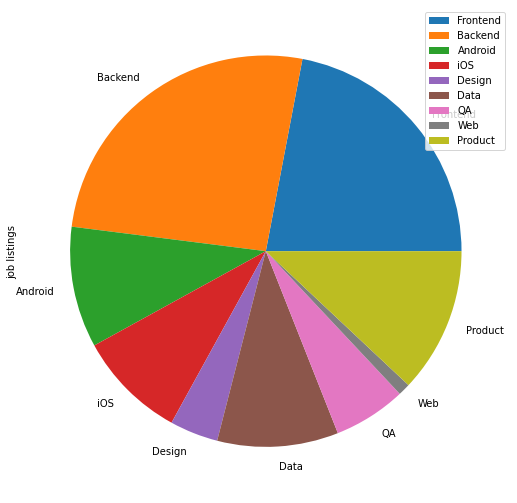

In [24]:
ax = roles_df.plot.pie(y="job listings", figsize=(9,9))

What countries have the mosty job openings for foreign talent?

In [11]:

countries_list =["GER",
"NLD",
"CAN",
"JPN",
"UK",
"ESP",
"US",
"AUT",
"IRE",
"SIN"]
countries_values=[count_flex(all_jobs, "Germany"),
count_flex(all_jobs, "Netherlands"),
count_flex(all_jobs, "Canada"),
count_flex(all_jobs, "Japan"),
count_flex(all_jobs, "United Kingdom"),
count_flex(all_jobs, "Spain"),
count_flex(all_jobs, "United States"),
count_flex(all_jobs, "Austria"),
count_flex(all_jobs, "Ireland"),
count_flex(all_jobs, "Singapore")

]
countries_df=pd.DataFrame({"countries":countries_list, "job listings":countries_values})
print(countries_df)

  countries  job listings
0       GER            21
1       NLD            47
2       CAN             4
3       JPN            17
4        UK             9
5       ESP            11
6        US            15
7       AUT            10
8       IRE             2
9       SIN             3


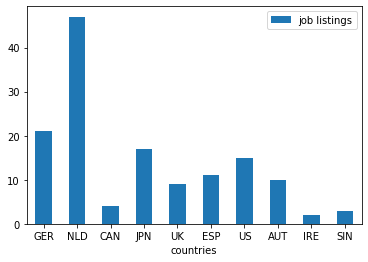

In [12]:
ax = countries_df.plot.bar(x="countries", y="job listings", rot=0)